### Deep Learning with Python, TensorFlow, and Keras tutorial
#### https://www.youtube.com/watch?v=wQ8BIBpya2k
#### sentex

In [2]:
import tensorflow as tf

tf.__version__

'1.4.0'

In [24]:
#load data
mnist = tf.keras.datasets.mnist #28*28 hand-written digits

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1) #normalize
x_test = tf.keras.utils.normalize(x_test, axis=1) ##normalize

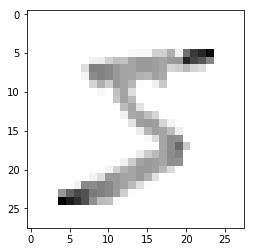

In [19]:
#show one image
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary) #cmap = calor map, show image as grayscale
plt.show()

In [20]:
#model define
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #flat the input images to vectors
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #out

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 6s - loss: 0.2604 - acc: 0.9256     
Epoch 2/3
60000/60000 [==============================] - 6s - loss: 0.1040 - acc: 0.9678     
Epoch 3/3
60000/60000 [==============================] - 6s - loss: 0.0705 - acc: 0.9784     


In [22]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

 9472/10000 [===========================>..] - ETA: 0s0.09573846328780056 0.9706


In [25]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])
print(predictions)

[[1.2980807e-10 1.6212452e-09 5.6026312e-07 ... 9.9999905e-01
  4.3857864e-09 2.9900324e-08]
 [1.8342023e-06 9.1843111e-05 9.9981838e-01 ... 5.0693640e-09
  8.5055735e-06 6.1036315e-10]
 [1.8284622e-07 9.9937588e-01 1.8112163e-05 ... 1.0365772e-04
  1.8568286e-04 4.0872717e-05]
 ...
 [2.0767347e-08 9.8910493e-07 1.6415168e-08 ... 3.2973141e-05
  6.3718608e-06 4.8901995e-05]
 [3.5563401e-06 1.1571342e-06 2.7938322e-08 ... 1.5705029e-06
  4.2827854e-05 8.6202128e-08]
 [3.4348852e-07 1.1888284e-09 4.8404134e-09 ... 2.3605343e-11
  9.4001260e-09 3.4539982e-10]]


In [27]:
import numpy as np
print(np.argmax(predictions[0]))

7


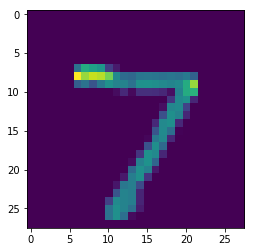

In [28]:
plt.imshow(x_test[0])
plt.show()